In [ ]:
#Install library 
!pip install progressbar2
!pip install scikit-learn
!pip install pickle-mixin
!pip install tqdm
!pip install pythainlp[full]
!pip install hf-lfs

In [ ]:
import gdown
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
#read data from source 
df = pd.read_csv("https://raw.githubusercontent.com/PyThaiNLP/thai-sentiment-analysis-dataset/master/review_shopping.csv", sep='\t', 
                 names=['text', 'sentiment'], header=None)
df.head()

,text,sentiment
0,เกลียด ชอบหลอกให้สั่งซื้อ ที่ไหนได้ไม่มีสิ้นค้า,neg
1,สินค้าด้อยคุณภาพ,neg
2,สินค้าหมดทำไมไม่แจ้งขึ้นว่าหมดอะ.กดใส่ตะกร้าไป...,neg
3,อย่าทำแบบนี้กับใครอีกนะค่ะแย่มากค่ะ,neg
4,คือเเบบผิดหวังมาก เเย่ที่สุดได้ของมาฝาเเตก เเต...,neg


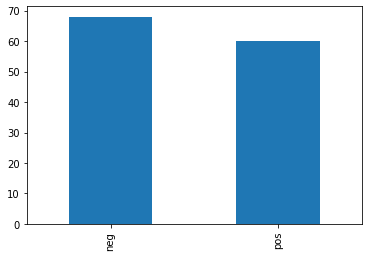

In [ ]:
#ref : https://karnyong.medium.com/%E0%B9%80%E0%B8%82%E0%B8%B5%E0%B8%A2%E0%B8%99-python-%E0%B8%AA%E0%B8%A3%E0%B9%89%E0%B8%B2%E0%B8%87%E0%B9%81%E0%B8%9A%E0%B8%9A%E0%B8%88%E0%B8%B3%E0%B8%A5%E0%B8%AD%E0%B8%87%E0%B8%81%E0%B8%B2%E0%B8%A3%E0%B8%A7%E0%B8%B4%E0%B9%80%E0%B8%84%E0%B8%A3%E0%B8%B2%E0%B8%B0%E0%B8%AB%E0%B9%8C%E0%B8%A3%E0%B8%B9%E0%B9%89%E0%B8%AA%E0%B8%B6%E0%B8%81-sentiment-analysis-%E0%B8%AA%E0%B8%B3%E0%B8%AB%E0%B8%A3%E0%B8%B1%E0%B8%9A%E0%B8%A0%E0%B8%B2%E0%B8%A9%E0%B8%B2%E0%B9%84%E0%B8%97%E0%B8%A2-cdb43de08e9a
#plot summary data from dataframe

df['sentiment'].value_counts().plot.bar()

In [ ]:
#Preprocessing from pythainlp stop words
from pythainlp.corpus.common import thai_stopwords
thai_stopwords = list(thai_stopwords())

In [ ]:
#create function for apply to dataframe 
from pythainlp import word_tokenize
def text_process(text):
    final = "".join(u for u in text if u not in ("?", ".", ";", ":", "!", '"', "ๆ", "ฯ"))
    final = word_tokenize(final)
    final = " ".join(word for word in final)
    final = " ".join(word for word in final.split() 
                     if word.lower not in thai_stopwords)
    return final
df['text_tokens'] = df['text'].apply(text_process)
df

,text,sentiment,text_tokens
0,เกลียด ชอบหลอกให้สั่งซื้อ ที่ไหนได้ไม่มีสิ้นค้า,neg,เกลียด ชอบ หลอก ให้ สั่งซื้อ ที่ไหนได้ ไม่ มี ...
1,สินค้าด้อยคุณภาพ,neg,สินค้า ด้อย คุณภาพ
2,สินค้าหมดทำไมไม่แจ้งขึ้นว่าหมดอะ.กดใส่ตะกร้าไป...,neg,สินค้า หมด ทำไม ไม่ แจ้ง ขึ้น ว่า หมด อะ กด ใส...
3,อย่าทำแบบนี้กับใครอีกนะค่ะแย่มากค่ะ,neg,อย่า ทำ แบบนี้ กับ ใคร อีก นะ ค่ะ แย่มาก ค่ะ
4,คือเเบบผิดหวังมาก เเย่ที่สุดได้ของมาฝาเเตก เเต...,neg,คือ เเบบ ผิดหวัง มาก เเย่ ที่สุด ได้ ของ มา ฝา...
...,...,...,...
123,สินค้ามีตำหนิ แย่มากๆ ไม่ไหวๆเลย ถ้ามีตำหนิก็บ...,neg,สินค้า มีตำหนิ แย่มาก ไม่ ไหว เลย ถ้า มีตำหนิ ...
124,เปราะบางมากความแข็งแรงน้อย มันง่ายต่อการแตกหัก,neg,เปราะบาง มาก ความแข็งแรง น้อย มัน ง่าย ต่อ การ...
125,ขนส่งก็ช้าสินค้ามีตำหนิแพ็คสินค้าไม่ดีมีรอยบุบ,neg,ขนส่ง ก็ ช้า สินค้า มีตำหนิ แพ็ค สินค้า ไม่ ดี...
126,สินค้าเหมือนของปลอม เนื่อครีมเหมือนซอง 10 บาท ...,neg,สินค้า เหมือน ของปลอม เนื่อ ครีม เหมือน ซอง 10...


In [ ]:
#Split train and text 70 -30 by train test split scikitlearn
from sklearn.model_selection import train_test_split
X = df[['text_tokens']]
y = df['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [ ]:
#Create word for vector by count vectorization and Bag of Word (BOW)
from sklearn.feature_extraction.text import CountVectorizer
cvec = CountVectorizer(analyzer=lambda x:x.split(' '))
cvec.fit_transform(X_train['text_tokens'])
cvec.vocabulary_

In [ ]:
train_bow = cvec.transform(X_train['text_tokens'])
pd.DataFrame(train_bow.toarray(), columns=cvec.get_feature_names(), index=X_train['text_tokens'])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,10,OK,กก,กด,กระทะ,กลิ่น,กล่อง,กว่า,กับ,กางเกง,...,ไม่ค่อย,ไม่ต้อง,ไว,ไว้,ไว้ใจ,ไหนจะ,ไหม้,ไหล,ไหว,☺
text_tokens,,,,,,,,,,,,,,,,,,,,,
แย่มาก บิด น้ำ ไม่ แห้ง เสียดาย ตัง มาก,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
อย่า ทำ แบบนี้ กับ ใคร อีก นะ ค่ะ แย่มาก ค่ะ,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
รับ ของ ไว พนักงาน ส่ง ของ ดีมาก คุณภาพ คุ้ม ราคา,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
ซื้อ แล้ว ผิดหวัง สินค้า ไม่ มี คุณภาพ,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
สิน ค้าส่ง มา แตกหัก ยัง ไม่ ได้ ประกอบ เลย เสียความรู้สึก,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
แย่มาก เสียดาย เงิน,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
สินค้า ใช้ ดี สีสด ใช้ จนถึง ทุกวันนี้,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
แพ็ค ของ ไม่ ดีมาก เลย ครับ ข้างใน กล่อง ฉีกขาด ไม่ สวย เลย,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train_bow, y_train)

LogisticRegression()

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
test_bow = cvec.transform(X_test['text_tokens'])
test_predictions = lr.predict(test_bow)
print(classification_report(test_predictions, y_test))

              precision    recall  f1-score   support

         neg       0.96      0.92      0.94        24
         pos       0.88      0.93      0.90        15

    accuracy                           0.92        39
   macro avg       0.92      0.93      0.92        39
weighted avg       0.93      0.92      0.92        39



In [ ]:
#create function for predict sentence 
my_text = 'ตรงปกส่งไวครับ'
my_tokens = text_process(my_text)
my_bow = cvec.transform(pd.Series([my_tokens]))
my_predictions = lr.predict(my_bow)
my_predictions

array(['pos'], dtype=object)

In [ ]:
my_text = 'ไม่ตรงปกส่งช้าครับ หอยหลอด ไม่อยากจะด่า'
my_tokens = text_process(my_text)
my_bow = cvec.transform(pd.Series([my_tokens]))
my_predictions = lr.predict(my_bow)
my_predictions

array(['neg'], dtype=object)